# Kaggle Competition ##  
Thomas Durkin and Miguel Novo Villar - 	Data Science Capstone 

##### Packages

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt    
np.random.seed(265)
from tqdm import tqdm 

from googletrans import Translator
from google_trans_new import google_translator

from langdetect import detect
import translators as ts
import warnings

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
    #from nltk.stem.porter import PorterStemmer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("averaged_perceptron_tagger")

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# from sklearn.svm import SVC
# from sklearn import svm

#### Load data

In [2]:
data_train = pd.read_csv("tweets&translations.csv")
data_test = pd.read_csv("test_data_translation.csv")
data_train.shape, data_test.shape

C:\Users\migue\AppData\Local\Temp/ipykernel_84444/2334808338.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv("tweets&translations.csv")


((240000, 7), (60000, 7))

#### This code will be used to add a translations column to the data.

In [3]:
#https://towardsdatascience.com/twitter-json-data-processing-3f353a5deac4
#https://towardsdatascience.com/how-to-detect-and-translate-languages-for-nlp-project-dfd52af0c3b5


# tweets_en = []

# def new_col_translated(data, target_lang):
#     for tweet in  tqdm(data.text):

#         try: #english tweets
            
#             result_lang = detect(tweet)
#             if result_lang == target_lang:
#                 tweets_en.append(tweet) 

#             else: #other language tweets

#                 ############API does not work############
#                 # translator = google_translator()
#                 # translate_text = translator.translate(tweet, lang_src=result_lang, lang_tgt=target_lang) 
#                 ############API does not work############

#                 translate_text = ts.google(tweet, from_language= result_lang, to_language=target_lang)
#                 tweets_en.append(translate_text) 

#         except: #unable to translate
#             tweets_en.append(tweet)

# new_col_translated(data_test, "en")
# data_test['all_english_text'] = np.array(tweets_en) #load into dataframe

100%|██████████| 60000/60000 [1:13:51<00:00, 13.54it/s]


# Part I: Descriptive Analysis - A

Create  a  table  that  contains  information on  minimum,  average,  median,  and maximum  for  the 
following:  tweet  length  (#characters  and  #words)  (text  column),  hashtag  length  (#characters 
and  #words)  (hashtags    column)  (Add  your  table  to  the  report  at  the  end.)  (10  points  for 
undergraduate students, 5 points for graduate students)

## TEXT COL

#### Characters

In [4]:
#Calculate the AVERAGE lenght of tweets (Characters)
def tweet_len_char_avg(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return sum(lenghts)/len(data)
tweet_len_char_avg(data_train.text)

204.98047916666667

In [5]:
#Calculate the MAX lenght of tweets (Characters)
def tweet_len_char_max(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return max(lenghts)
tweet_len_char_max(data_train.text)

425

In [6]:
#Calculate the MIN lenght of tweets (Characters)
def tweet_len_char_min(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return min(lenghts)
tweet_len_char_min(data_train.text)

1

In [7]:
#Calculate the MEDIAN lenght of tweets (Characters)
def tweet_len_char_median(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return np.median(lenghts)
tweet_len_char_median(data_train.text)

221.0

#### Words

In [8]:
#Calculate the AVERAGE number of words
def tweet_len_words_avg(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return sum(word_count)/len(data)
tweet_len_words_avg(data_train.text)

28.832408333333333

In [9]:
#Calculate the MIN number of Words in tweets
def tweet_len_words_min(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return min(word_count)
tweet_len_words_min(data_train.text)

1

In [10]:
#Calculate the MAX number of Words in tweets
def tweet_len_words_max(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return max(word_count)
tweet_len_words_max(data_train.text)

82

In [11]:
#Calculate the MEDIAN number of Words in tweets
def tweet_len_words_max(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return np.median(word_count)
tweet_len_words_max(data_train.text)

30.0

## HASHTHAG COL

#### Characters

In [12]:
#Calculate the AVERAGE lenght of hashtags (Characters)
def hashtag_len_char_avg(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return sum(lenghts)/len(data)
hashtag_len_char_avg(data_train.hashtags)

16.503920833333332

In [13]:
#Calculate the MIN lenght of hashtags (Characters)
def hashtag_len_char_min(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return min(lenghts)
hashtag_len_char_min(data_train.hashtags)

1

In [14]:
#Calculate the MAX lenght of hashtags (Characters)
def hashtag_len_char_max(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return max(lenghts)
hashtag_len_char_max(data_train.hashtags)

124

In [15]:
#Calculate the MEDIAN lenght of hashtags (Characters)
def hashtag_len_char_median(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return np.median(lenghts)
hashtag_len_char_median(data_train.hashtags)

11.0

#### Words

In [ ]:
#Calculate the AVERAGE number of hashtags
def hashtags_len_words_avg(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return sum(word_count)/len(data)
hashtags_len_words_avg(data_train.hashtags)

1.8100708333333333

In [ ]:
#Calculate the MIN number of hashtags
def hashtags_len_words_min(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return min(word_count)
hashtags_len_words_min(data_train.hashtags)

1

In [ ]:
#Calculate the MAX number of hashtags
def hashtags_len_words_max(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return max(word_count)
hashtags_len_words_max(data_train.hashtags)

20

In [ ]:
#Calculate the MEDIAN number of hashtags
def hashtags_len_words_median(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return np.median(word_count)
hashtags_len_words_median(data_train.hashtags)

1.0

# Part I: Descriptive Analysis - C

Using  the  lda_tutorial.pdf  file  in  the  assignment  folder,  perform  a  Latent  Dirichlet  Allocation 
(LDA) analysis to extract the topics in the text column in an unsupervised manner. Set the number 
of  clusters/topics  to  10  (ten)  (you  can  adjust  other  settings  to  obtain the  results  that  you  think 
work  the  best).  What  are  your  observations?  Does  each  cluster  seem  to  form  a  meaningful 
subset? What do they seem to represent? (Add the clusters and your observations to the report 
at the end.) (10 points for undergraduate students, 5 points for graduate students)

### Steps

1- Data Cleaning

2- EDA

3- Prepare data for LDA analysis

4- LDA Model Training

5- Analyze LDS model results

In [24]:
data_train.head(2)

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,all_english_text
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us,Remember the #WuhanCoronaVirus? The pandemic w...
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us,My sources @WhiteHouse say 2 tactics will be u...


In [3]:
#Cleaning the text. 
# Source: https://www.kaggle.com/code/clmentbisaillon/twitter-customer-support-data-cleaning

rare = re.compile(r"\^\S*")
new_line = re.compile(r"\n+\S*")
sig = re.compile(r"-\S*")

#Initial preprocessing function
def preprocessor(data):
    corpus = []
    for i in range(len(data)):
        #remove urls
        tweet= re.sub(r'http\S+', ' ', data["all_english_text"][i])

        #remove mentions
        tweet = re.sub('@[A-Za-z0–9]+', '', tweet)
        tweet = re.sub("@[\w]*","",tweet)
        
        # # # Contractions (Source: https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert/notebook)
        tweet = re.sub(r"he's", "he is", tweet)
        tweet = re.sub(r"there's", "there is", tweet)
        tweet = re.sub(r"We're", "We are", tweet)
        tweet = re.sub(r"That's", "That is", tweet)
        tweet = re.sub(r"won't", "will not", tweet)
        tweet = re.sub(r"they're", "they are", tweet)
        tweet = re.sub(r"Can't", "Cannot", tweet)
        tweet = re.sub(r"wasn't", "was not", tweet)
        tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
        tweet = re.sub(r"aren't", "are not", tweet)
        tweet = re.sub(r"isn't", "is not", tweet)
        tweet = re.sub(r"What's", "What is", tweet)
        tweet = re.sub(r"haven't", "have not", tweet)
        tweet = re.sub(r"hasn't", "has not", tweet)
        tweet = re.sub(r"There's", "There is", tweet)
        tweet = re.sub(r"He's", "He is", tweet)
        tweet = re.sub(r"It's", "It is", tweet)
        tweet = re.sub(r"You're", "You are", tweet)
        tweet = re.sub(r"I'M", "I am", tweet)
        tweet = re.sub(r"shouldn't", "should not", tweet)
        tweet = re.sub(r"wouldn't", "would not", tweet)
        tweet = re.sub(r"i'm", "I am", tweet)
        tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
        tweet = re.sub(r"I'm", "I am", tweet)
        tweet = re.sub(r"Isn't", "is not", tweet)
        tweet = re.sub(r"Here's", "Here is", tweet)
        tweet = re.sub(r"you've", "you have", tweet)
        tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
        tweet = re.sub(r"we're", "we are", tweet)
        tweet = re.sub(r"what's", "what is", tweet)
        tweet = re.sub(r"couldn't", "could not", tweet)
        tweet = re.sub(r"we've", "we have", tweet)
        tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
        tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
        tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
        tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
        tweet = re.sub(r"who's", "who is", tweet)
        tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
        tweet = re.sub(r"y'all", "you all", tweet)
        tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
        tweet = re.sub(r"would've", "would have", tweet)
        tweet = re.sub(r"it'll", "it will", tweet)
        tweet = re.sub(r"we'll", "we will", tweet)
        tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
        tweet = re.sub(r"We've", "We have", tweet)
        tweet = re.sub(r"he'll", "he will", tweet)
        tweet = re.sub(r"Y'all", "You all", tweet)
        tweet = re.sub(r"Weren't", "Were not", tweet)
        tweet = re.sub(r"Didn't", "Did not", tweet)
        tweet = re.sub(r"they'll", "they will", tweet)
        tweet = re.sub(r"they'd", "they would", tweet)
        tweet = re.sub(r"DON'T", "DO NOT", tweet)
        tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
        tweet = re.sub(r"they've", "they have", tweet)
        tweet = re.sub(r"i'd", "I would", tweet)
        tweet = re.sub(r"should've", "should have", tweet)
        tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
        tweet = re.sub(r"where's", "where is", tweet)
        tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
        tweet = re.sub(r"we'd", "we would", tweet)
        tweet = re.sub(r"i'll", "I will", tweet)
        tweet = re.sub(r"weren't", "were not", tweet)
        tweet = re.sub(r"They're", "They are", tweet)
        tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
        tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
        tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
        tweet = re.sub(r"let's", "let us", tweet)
        tweet = re.sub(r"it's", "it is", tweet)
        tweet = re.sub(r"can't", "cannot", tweet)
        tweet = re.sub(r"don't", "do not", tweet)
        tweet = re.sub(r"you're", "you are", tweet)
        tweet = re.sub(r"i've", "I have", tweet)
        tweet = re.sub(r"that's", "that is", tweet)
        tweet = re.sub(r"i'll", "I will", tweet)
        tweet = re.sub(r"doesn't", "does not", tweet)
        tweet = re.sub(r"i'd", "I would", tweet)
        tweet = re.sub(r"didn't", "did not", tweet)
        tweet = re.sub(r"ain't", "am not", tweet)
        tweet = re.sub(r"you'll", "you will", tweet)
        tweet = re.sub(r"I've", "I have", tweet)
        tweet = re.sub(r"Don't", "do not", tweet)
        tweet = re.sub(r"I'll", "I will", tweet)
        tweet = re.sub(r"I'd", "I would", tweet)
        tweet = re.sub(r"Let's", "Let us", tweet)
        tweet = re.sub(r"you'd", "You would", tweet)
        tweet = re.sub(r"It's", "It is", tweet)
        tweet = re.sub(r"Ain't", "am not", tweet)
        tweet = re.sub(r"Haven't", "Have not", tweet)
        tweet = re.sub(r"Could've", "Could have", tweet)
        tweet = re.sub(r"youve", "you have", tweet)  
        tweet = re.sub(r"donå«t", "do not", tweet) 
        
        # Character entity references
        tweet = re.sub(r"&gt;", "", tweet)
        tweet = re.sub(r"&lt;", "", tweet)
        tweet = re.sub(r"&amp;", "", tweet)      
        
        #remove emoji
        tweet=re.sub("[^\w\s#@/:%.,_-]", "", tweet, flags=re.UNICODE)#remove emoji
        
        tweet = tweet.replace('x', '')
        
        #remove html tags
        tweet = re.sub(r'<.*?>',' ', tweet) 
        
        #rare
        tweet = rare.sub(r'', tweet)

        #new line
        tweet = new_line.sub(r'.', tweet)

        #remove digits
        tweet = re.sub(r'\d+',' ', tweet)
        
        # #remove hashtags
        # tweet = re.sub(r'#\w+',' ', tweet)
        
        #remove white
        tweet = re.sub("^\\s+|\\s+$", "", tweet)  # Remove leading and trailing white space
        #unite multispace
        tweet = ' '.join(tweet.split())
        review = re.sub('[^a-zA-Z]', ' ', tweet)

        review = review.lower()
        review = review.split()

        review = ' '.join(review)
        corpus.append(review)
    return corpus   

#FUNCTIONS APPLIED

def convert_list_of_str_to_list_lists(X):
    return [list(sentence) for sentence in X]

def remove_stopwords(word_tokens):
    stop_words = stopwords.words('english')
    stop_words.extend(["amp","wa","ta","ha","nn","ie","ste"])
    return [w for w in word_tokens if not w.lower() in stop_words]

def tokenize_words(X, tweet_tokenizer=True, rmv_stopwords=True):
    if tweet_tokenizer:
        tokenize = TweetTokenizer().tokenize
    else:
        tokenize = nltk.word_tokenize

    word_tokens = [tokenize(sentence) for sentence in X]

    if rmv_stopwords:
        return [remove_stopwords(tokens) for tokens in word_tokens]
    else:
        return word_tokens

def pos_tagging_words(X):
    return [[nltk.pos_tag(sentence)] for sentence in X]

def lemmatize_words(X, lemmatizer):
    X_lemmatize = list()
    for sentence in X:
        X_lemmatize.append([[lemmatizer.lemmatize(word)] for word in sentence])
    return X_lemmatize

def prepare_tokens_for_vectorize(X):
    X_preproc = list()
    for sentence_tok in X:
        tokens = [tok[0] for tok in sentence_tok]
        X_preproc.append(" ".join(tokens))

    return X_preproc
    

In [23]:
training_df = data_train
test_df = data_test

X_train = preprocessor(data_train)
y_train = np.array(training_df["country"])

X_test = preprocessor(test_df)
# y_test = np.array(test_df["country"])

X_token_train = tokenize_words(X_train)
X_token_test = tokenize_words(X_test)

X_pos_tag_train = pos_tagging_words(X_token_train)
X_pos_tag_test = pos_tagging_words(X_token_test)

X_lemma_train = lemmatize_words(X_token_train, WordNetLemmatizer())
X_lemma_test = lemmatize_words(X_token_test, WordNetLemmatizer())

X_prep_train = prepare_tokens_for_vectorize(X_lemma_train)
X_prep_test = prepare_tokens_for_vectorize(X_lemma_test)

#Attach
data_train["clean_text"] = np.array(X_prep_train)
data_test["clean_text"] = np.array(X_prep_test)

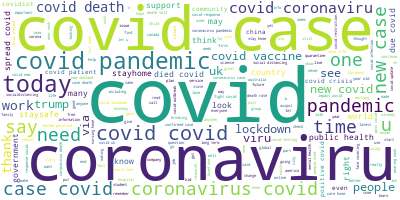

In [28]:
# # Join the different processed titles together.
# long_string = ','.join(list(data_train["clean_text"].values))

# # Create a WordCloud object
# wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# # Generate a word cloud
# wordcloud.generate(long_string)

# # Visualize the word cloud
# wordcloud.to_image()

c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


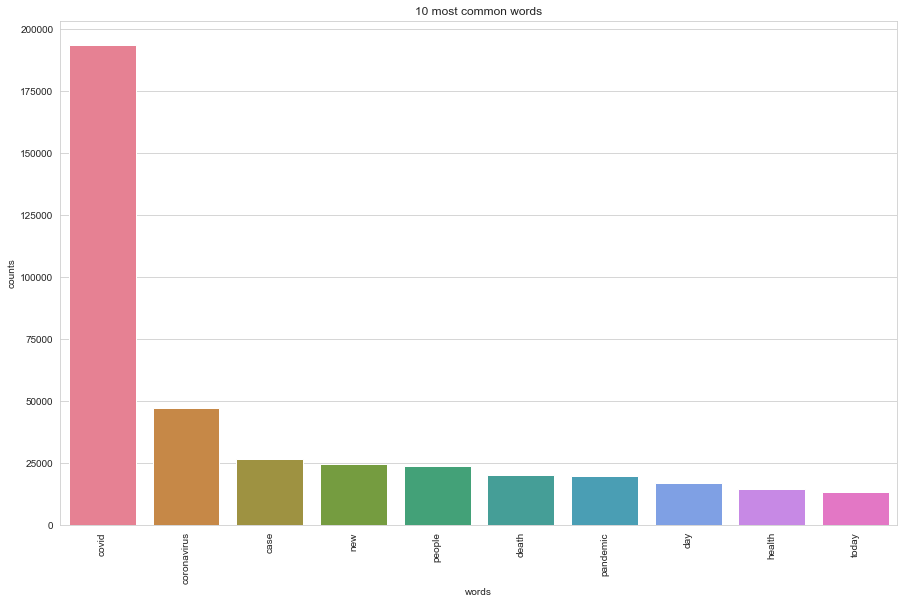

In [5]:
#Prepate text for LDA

# Load the library with the CountVectorizer method

sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    # import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    
    for t in count_data:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data_train["clean_text"].dropna())
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [6]:
# import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
            for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Tweak the two parameters below
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
covid help pandemic health need people risk care coronavirus child

Topic #1:
covid coronavirus pandemic health crisis support response report world impact

Topic #2:
covid coronavirus trump people flu election like covidiots vote dr

Topic #3:
covid staysafe stayhome day today pm socialdistancing thank lockdown great

Topic #4:
covid case new death day coronavirus number today week total

Topic #5:
covid life people lockdown home day coronavirus time quarantine nurse

Topic #6:
covid test positive death tested coronavirus testing people died uk

Topic #7:
covid vaccine coronavirus auspol government latest say dr thanks australia

Topic #8:
covid coronavirus trump like pandemic people news medium know world

Topic #9:
covid mask coronavirus people spread face china hand wear american


c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Answer: Topics

Topics found via LDA:

Topic #0:
covid report new zealand day lockdown coronavirus today patient data

Topic #1:
covid pandemic vaccine support new help coronavirus health business impact

Topic #2:
covid case death new day coronavirus number people test positive

Topic #3:
coronavirus covid uk test flu government positive people quarantine trump

Topic #4:
covid dr coronavirus treatment fauci hydroychloroquine study virus immunity say

Topic #5:
covid home stayhome worker school staysafe care family life people

Topic #6:
covid mask people coronavirus spread face wear hand social distancing

Topic #7:
covid coronavirus minister china lockdown say week day medical uk

Topic #8:
covid trump coronavirus american people died america staysafe vote know

Topic #9:
covid pandemic need health people crisis government response economy world

In [57]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle
import pyLDAvis

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


Wall time: 14.7 s


# Part I: Descriptive Analysis - D

Using the code in the following link4, perform Non-negative Matrix Factorization for topic analysis. Again, like in question c), set the number of clusters/topics to 10 (ten) and extract the topics in an unsupervised manner. Adjust any parameters as you see fit. Analyze the results. Do you see any similarities or differences with respect to your results in c) ? Explain. (5 points)

In [7]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), lowercase=False)
vectorizer.fit(X_prep_train+X_prep_test)

X_final_train = vectorizer.transform(X_prep_train)
X_final_test = vectorizer.transform(X_prep_test)

Extracting tf-idf features for NMF...
done in 3.559s.
Extracting tf features for LDA...
done in 3.378s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 7.723s.


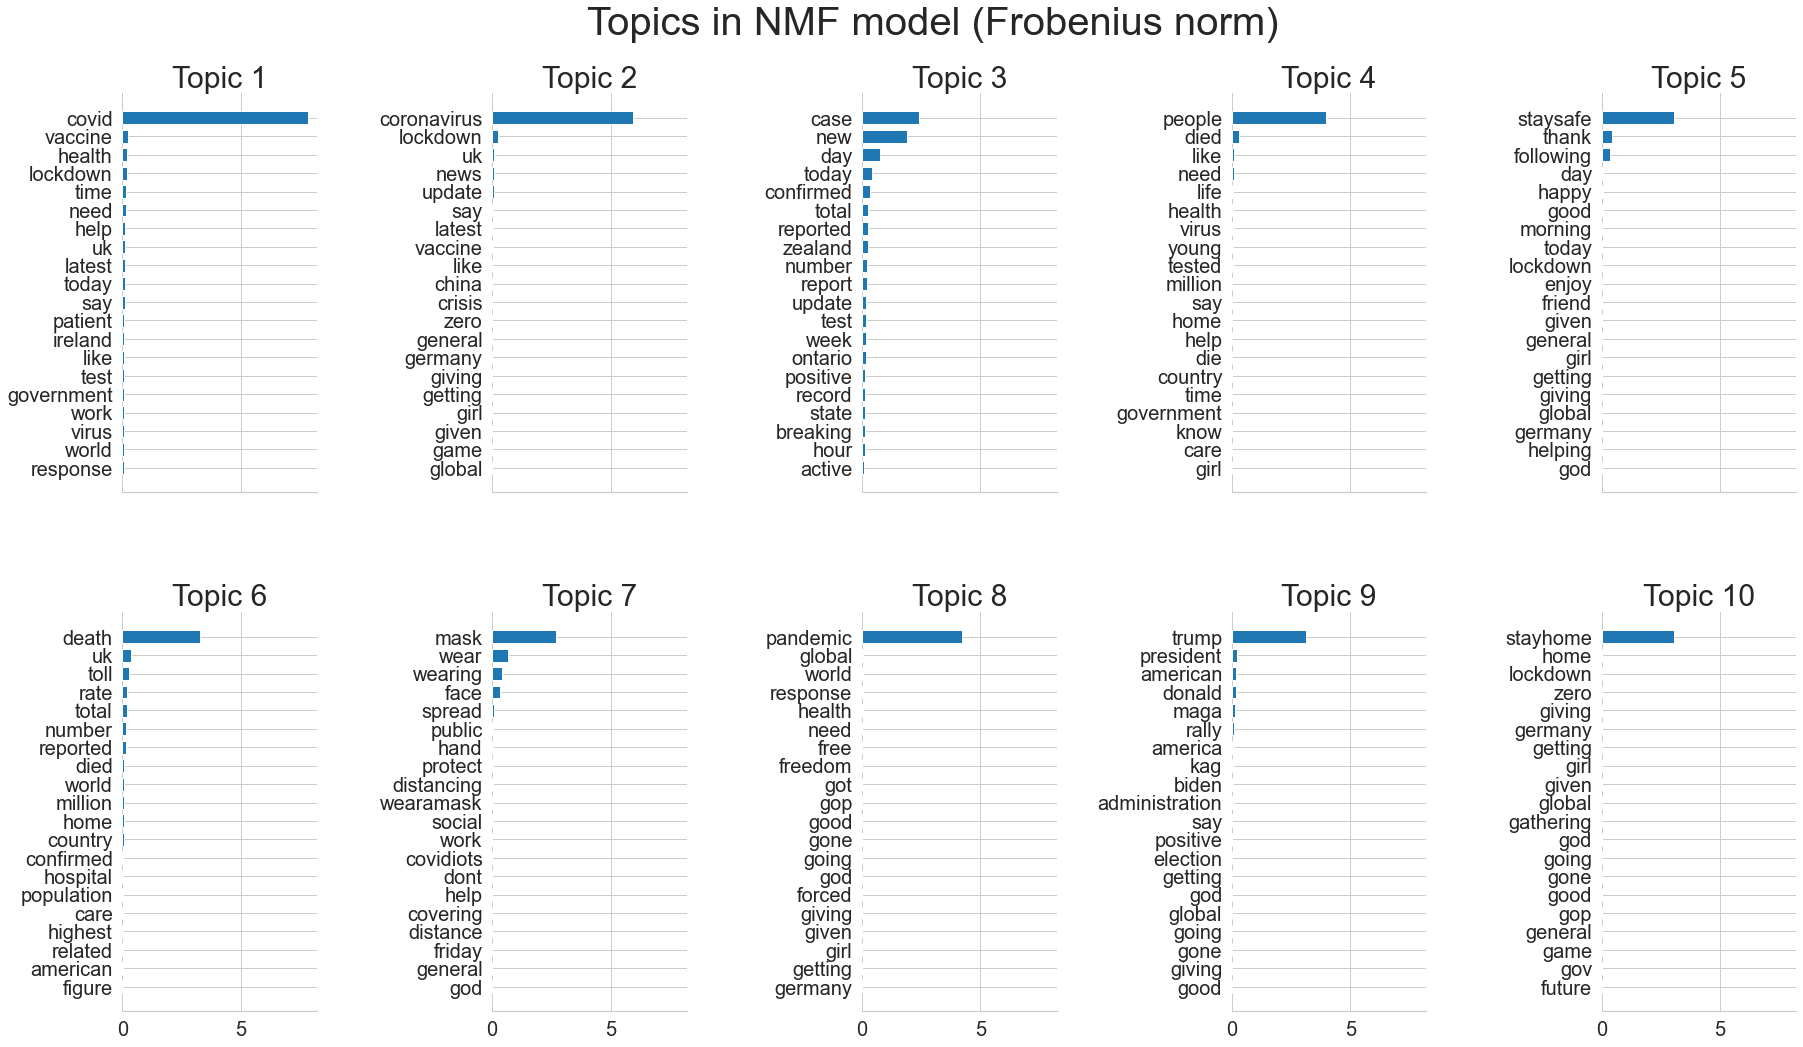

In [24]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(X_prep_train)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(X_prep_train)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Part I: Descriptive Analysis - E

Write a ‘text cleaner’ function that does the following: (i) remove stopwords5, (ii) remove all words that are shorter than 3 characters, (iii) remove all links (starting with http), (iv) remove emojis, (v) remove punctuation. Attach the code you wrote to the lemmatizer.py file in the project folder. Run the lemmatizer function and create ‘cleaned and lemmatized’ version of text column. (You can name the new column as text_clean). After the cleaning, expand the table you have created in Part I, a) by calculating minimum, average, median, and maximum for the newly created text_clean column (#characters and #words). (5 points)

In [66]:
#Cleaning the text. 
# Source: https://www.kaggle.com/code/clmentbisaillon/twitter-customer-support-data-cleaning

rare = re.compile(r"\^\S*")
new_line = re.compile(r"\n+\S*")
sig = re.compile(r"-\S*")

#Initial preprocessing function
def preprocessor(data):
    corpus = []
    for i in range(len(data)):
        #remove urls
        tweet= re.sub(r'http\S+', ' ', data["all_english_text"][i])

        #remove mentions
        tweet = re.sub('@[A-Za-z0–9]+', '', tweet)
        tweet = re.sub("@[\w]*","",tweet)
        
        # # # Contractions (Source: https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert/notebook)
        tweet = re.sub(r"he's", "he is", tweet)
        tweet = re.sub(r"there's", "there is", tweet)
        tweet = re.sub(r"We're", "We are", tweet)
        tweet = re.sub(r"That's", "That is", tweet)
        tweet = re.sub(r"won't", "will not", tweet)
        tweet = re.sub(r"they're", "they are", tweet)
        tweet = re.sub(r"Can't", "Cannot", tweet)
        tweet = re.sub(r"wasn't", "was not", tweet)
        tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
        tweet = re.sub(r"aren't", "are not", tweet)
        tweet = re.sub(r"isn't", "is not", tweet)
        tweet = re.sub(r"What's", "What is", tweet)
        tweet = re.sub(r"haven't", "have not", tweet)
        tweet = re.sub(r"hasn't", "has not", tweet)
        tweet = re.sub(r"There's", "There is", tweet)
        tweet = re.sub(r"He's", "He is", tweet)
        tweet = re.sub(r"It's", "It is", tweet)
        tweet = re.sub(r"You're", "You are", tweet)
        tweet = re.sub(r"I'M", "I am", tweet)
        tweet = re.sub(r"shouldn't", "should not", tweet)
        tweet = re.sub(r"wouldn't", "would not", tweet)
        tweet = re.sub(r"i'm", "I am", tweet)
        tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
        tweet = re.sub(r"I'm", "I am", tweet)
        tweet = re.sub(r"Isn't", "is not", tweet)
        tweet = re.sub(r"Here's", "Here is", tweet)
        tweet = re.sub(r"you've", "you have", tweet)
        tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
        tweet = re.sub(r"we're", "we are", tweet)
        tweet = re.sub(r"what's", "what is", tweet)
        tweet = re.sub(r"couldn't", "could not", tweet)
        tweet = re.sub(r"we've", "we have", tweet)
        tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
        tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
        tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
        tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
        tweet = re.sub(r"who's", "who is", tweet)
        tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
        tweet = re.sub(r"y'all", "you all", tweet)
        tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
        tweet = re.sub(r"would've", "would have", tweet)
        tweet = re.sub(r"it'll", "it will", tweet)
        tweet = re.sub(r"we'll", "we will", tweet)
        tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
        tweet = re.sub(r"We've", "We have", tweet)
        tweet = re.sub(r"he'll", "he will", tweet)
        tweet = re.sub(r"Y'all", "You all", tweet)
        tweet = re.sub(r"Weren't", "Were not", tweet)
        tweet = re.sub(r"Didn't", "Did not", tweet)
        tweet = re.sub(r"they'll", "they will", tweet)
        tweet = re.sub(r"they'd", "they would", tweet)
        tweet = re.sub(r"DON'T", "DO NOT", tweet)
        tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
        tweet = re.sub(r"they've", "they have", tweet)
        tweet = re.sub(r"i'd", "I would", tweet)
        tweet = re.sub(r"should've", "should have", tweet)
        tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
        tweet = re.sub(r"where's", "where is", tweet)
        tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
        tweet = re.sub(r"we'd", "we would", tweet)
        tweet = re.sub(r"i'll", "I will", tweet)
        tweet = re.sub(r"weren't", "were not", tweet)
        tweet = re.sub(r"They're", "They are", tweet)
        tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
        tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
        tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
        tweet = re.sub(r"let's", "let us", tweet)
        tweet = re.sub(r"it's", "it is", tweet)
        tweet = re.sub(r"can't", "cannot", tweet)
        tweet = re.sub(r"don't", "do not", tweet)
        tweet = re.sub(r"you're", "you are", tweet)
        tweet = re.sub(r"i've", "I have", tweet)
        tweet = re.sub(r"that's", "that is", tweet)
        tweet = re.sub(r"i'll", "I will", tweet)
        tweet = re.sub(r"doesn't", "does not", tweet)
        tweet = re.sub(r"i'd", "I would", tweet)
        tweet = re.sub(r"didn't", "did not", tweet)
        tweet = re.sub(r"ain't", "am not", tweet)
        tweet = re.sub(r"you'll", "you will", tweet)
        tweet = re.sub(r"I've", "I have", tweet)
        tweet = re.sub(r"Don't", "do not", tweet)
        tweet = re.sub(r"I'll", "I will", tweet)
        tweet = re.sub(r"I'd", "I would", tweet)
        tweet = re.sub(r"Let's", "Let us", tweet)
        tweet = re.sub(r"you'd", "You would", tweet)
        tweet = re.sub(r"It's", "It is", tweet)
        tweet = re.sub(r"Ain't", "am not", tweet)
        tweet = re.sub(r"Haven't", "Have not", tweet)
        tweet = re.sub(r"Could've", "Could have", tweet)
        tweet = re.sub(r"youve", "you have", tweet)  
        tweet = re.sub(r"donå«t", "do not", tweet) 
        
        # Character entity references
        tweet = re.sub(r"&gt;", "", tweet)
        tweet = re.sub(r"&lt;", "", tweet)
        tweet = re.sub(r"&amp;", "", tweet)      
        
        #remove emoji
        tweet=re.sub("[^\w\s#@/:%.,_-]", "", tweet, flags=re.UNICODE)#remove emoji
        
        tweet = tweet.replace('x', '')
        
        #remove html tags
        tweet = re.sub(r'<.*?>',' ', tweet) 
        
        #rare
        tweet = rare.sub(r'', tweet)

        #new line
        tweet = new_line.sub(r'.', tweet)

        #remove digits
        tweet = re.sub(r'\d+',' ', tweet)
        
        # #remove hashtags
        # tweet = re.sub(r'#\w+',' ', tweet)
        
        #remove white
        tweet = re.sub("^\\s+|\\s+$", "", tweet)  # Remove leading and trailing white space
        #unite multispace
        tweet = ' '.join(tweet.split())
        review = re.sub('[^a-zA-Z]', ' ', tweet)

        review = review.lower()
        review = review.split()

        review = ' '.join(review)
        corpus.append(review)
    return corpus   

#FUNCTIONS APPLIED

def convert_list_of_str_to_list_lists(X):
    return [list(sentence) for sentence in X]

def remove_stopwords(word_tokens):
    stop_words = stopwords.words('english')
    stop_words.extend(["amp","wa","ta","ha","nn","ie","ste"])
    return [w for w in word_tokens if not w.lower() in stop_words]

def tokenize_words(X, tweet_tokenizer=True, rmv_stopwords=True):
    if tweet_tokenizer:
        tokenize = TweetTokenizer().tokenize
    else:
        tokenize = nltk.word_tokenize

    word_tokens = [tokenize(sentence) for sentence in X]

    if rmv_stopwords:
        return [remove_stopwords(tokens) for tokens in word_tokens]
    else:
        return word_tokens

def pos_tagging_words(X):
    return [[nltk.pos_tag(sentence)] for sentence in X]

def lemmatize_words(X, lemmatizer):
    X_lemmatize = list()
    for sentence in X:
        X_lemmatize.append([[lemmatizer.lemmatize(word)] for word in sentence])
    return X_lemmatize

def prepare_tokens_for_vectorize(X):
    X_preproc = list()
    for sentence_tok in X:
        tokens = [tok[0] for tok in sentence_tok]
        X_preproc.append(" ".join(tokens))

    return X_preproc

In [67]:
training_df = data_train
test_df = data_test

X_train = preprocessor(data_train)
y_train = np.array(training_df["country"])

X_test = preprocessor(test_df)
# y_test = np.array(test_df["country"])

X_token_train = tokenize_words(X_train)
X_token_test = tokenize_words(X_test)

X_pos_tag_train = pos_tagging_words(X_token_train)
X_pos_tag_test = pos_tagging_words(X_token_test)

X_lemma_train = lemmatize_words(X_token_train, WordNetLemmatizer())
X_lemma_test = lemmatize_words(X_token_test, WordNetLemmatizer())

X_prep_train = prepare_tokens_for_vectorize(X_lemma_train)
X_prep_test = prepare_tokens_for_vectorize(X_lemma_test)

#Attach
data_train["clean_text"] = np.array(X_prep_train)
data_test["clean_text"] = np.array(X_prep_test)

### CHARACTERS

In [43]:
#Calculate the AVERAGE lenght of CLEAN tweets (Characters)
def tweet_len_char_avg(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return sum(lenghts)/len(data)
tweet_len_char_avg(data_train.clean_text)

122.37439583333334

In [44]:
#Calculate the MAX lenght of CLEAN tweets (Characters)
def tweet_len_char_max(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return max(lenghts)
tweet_len_char_max(data_train.clean_text)

412

In [45]:
#Calculate the MIN lenght of CLEAN tweets (Characters)
def tweet_len_char_min(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return min(lenghts)
tweet_len_char_min(data_train.clean_text)

0

In [46]:
#Calculate the MEDIAN lenght of CLEAN tweets (Characters)
def tweet_len_char_median(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return np.median(lenghts)
tweet_len_char_median(data_train.clean_text)

128.0

### WORDS

In [47]:
#Calculate the AVERAGE number of CLEAN words
def tweet_len_words_avg(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return sum(word_count)/len(data)
tweet_len_words_avg(data_train.clean_text)

16.568595833333333

In [49]:
#Calculate the MIN number of CLEAN Words in tweets
def tweet_len_words_min(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return min(word_count)
tweet_len_words_min(data_train.clean_text)

0

In [50]:
#Calculate the MAX number of CLEAN Words in tweets
def tweet_len_words_max(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return max(word_count)
tweet_len_words_max(data_train.clean_text)

47

In [52]:
#Calculate the MEDIAN number of CLEAN Words in tweets
def tweet_len_words_max(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return np.median(word_count)
tweet_len_words_max(data_train.clean_text)

17.0